In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#get the csv data here nd print head
df=pd.read_csv('loan_prediction.csv')
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [6]:
#print summary
print('shape------------>',df.shape)
print('each column and data type and its count','\n')
print(df.info())

shape------------> (614, 13)
each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


.There are total 614 rows and 13 columns.
.There are some null values .so, we have to remove them .
.We also have some column having datatype 'object'. so, we have to encode them into numeric datatype first.To, do further .         

In [7]:
#DataFrame statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#To check the count of not null of object datatype column we use
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

. WE have some null values in column Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History. so, first we have to remove them to use further.                  

In [9]:
#Filling null values in gender
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

#Filling null values in Married
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

#Filling null values in Dependents
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

#Filling null values in Self_Employed
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

#Filling null values in LoanAmount
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())


#Filling null values in Loan_Amount_Term
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

#Filling null values in Credit_History
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
#Verify if nana are filled
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

.Now all the nana values are filled.                     
.Now we were going to encode the object datatype column.                 

In [11]:
#To check the imbalancy ,we use
print('low(l) =>',df.Loan_Status.value_counts()[0])
print('high(h)  =>',df.Loan_Status.value_counts()[1])

low(l) => 422
high(h)  => 192


.Dataset is not imbalanced .so, we can proceed further.                       

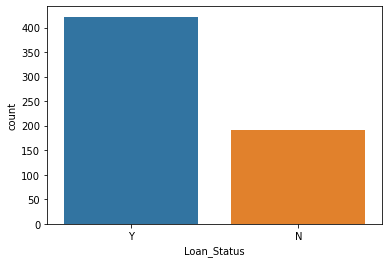

In [12]:
#plot each class frequency
sns.countplot(x='Loan_Status',data=df)
plt.show()

In [13]:
#Drop column 'Loan_ID' as it doesnot play a vital role in deciding outcome.
df=df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
#Encoding Techniques
from sklearn.preprocessing import OrdinalEncoder

In [15]:
#Encoding Gender column
ord_encoder=OrdinalEncoder(categories=[['Female','Male']])
df1=ord_encoder.fit_transform(df[['Gender']])
df1

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [16]:
#Encoding Married column
ord_encoder=OrdinalEncoder(categories=[['Yes','No']])
df2=ord_encoder.fit_transform(df[['Married']])
df2

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

In [17]:
#Encoding Education column
ord_encoder=OrdinalEncoder(categories=[['Graduate','Not Graduate']])
df3=ord_encoder.fit_transform(df[['Education']])
df3

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [18]:
#Encoding Self_Employed column
ord_encoder=OrdinalEncoder(categories=[['Yes','No']])
df4=ord_encoder.fit_transform(df[['Self_Employed']])
df4

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [19]:
#Encoding Property_Area column
ord_encoder=OrdinalEncoder(categories=[['Urban','Rural','Semiurban']])
df5=ord_encoder.fit_transform(df[['Property_Area']])
df5

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],

In [22]:
#Encoding Dependents column
ord_encoder=OrdinalEncoder(categories=[['0','1','2','3+']])
df6=ord_encoder.fit_transform(df[['Dependents']])
df6

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],

In [23]:
#Overriding these column value with codes in Dataset.                  
df['Gender']=df1
df['Married']=df2
df['Education']=df3
df['Self_Employed']=df4
df['Property_Area']=df5
df['Dependents']=df6
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.0,0.0,1.0,5849,0.0,146.412162,360.0,1.0,0.0,Y
1,1.0,0.0,1.0,0.0,1.0,4583,1508.0,128.000000,360.0,1.0,1.0,N
2,1.0,0.0,0.0,0.0,0.0,3000,0.0,66.000000,360.0,1.0,0.0,Y
3,1.0,0.0,0.0,1.0,1.0,2583,2358.0,120.000000,360.0,1.0,0.0,Y
4,1.0,1.0,0.0,0.0,1.0,6000,0.0,141.000000,360.0,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,1.0,0.0,0.0,1.0,2900,0.0,71.000000,360.0,1.0,1.0,Y
610,1.0,0.0,3.0,0.0,1.0,4106,0.0,40.000000,180.0,1.0,1.0,Y
611,1.0,0.0,1.0,0.0,1.0,8072,240.0,253.000000,360.0,1.0,0.0,Y
612,1.0,0.0,2.0,0.0,1.0,7583,0.0,187.000000,360.0,1.0,0.0,Y


In [24]:
#SelectKBest use f_classif fuction to find best features, where f_classif uses ANOVA test.                   
from sklearn.feature_selection import SelectKBest,f_classif

In [25]:
#Replace Label column(Income) into binary codes
df['Loan_Status']=df['Loan_Status'].replace({'N':0,'Y':1})

In [26]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status

In [27]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,0.0,1.0,5849,0.0,146.412162,360.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,4583,1508.0,128.000000,360.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,3000,0.0,66.000000,360.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,2583,2358.0,120.000000,360.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,6000,0.0,141.000000,360.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,1.0,0.0,0.0,1.0,2900,0.0,71.000000,360.0,1.0,1.0
610,1.0,0.0,3.0,0.0,1.0,4106,0.0,40.000000,180.0,1.0,1.0
611,1.0,0.0,1.0,0.0,1.0,8072,240.0,253.000000,360.0,1.0,0.0
612,1.0,0.0,2.0,0.0,1.0,7583,0.0,187.000000,360.0,1.0,0.0


In [28]:
best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

#Concatnate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

#name output columns
print(feature_scores.nlargest(9,'score'))

         Feature_Name       score
9      Credit_History  252.555883
10      Property_Area    6.594980
1             Married    5.164552
3           Education    4.547685
6   CoapplicantIncome    2.151457
7          LoanAmount    0.812667
8    Loan_Amount_Term    0.269339
0              Gender    0.198059
2          Dependents    0.062665


In [29]:
#Model Building
new_x=df[['Credit_History','Property_Area','Married','Education','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Gender','Dependents']]

In [30]:
new_x

,Credit_History,Property_Area,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Dependents
0,1.0,0.0,1.0,0.0,0.0,146.412162,360.0,1.0,0.0
1,1.0,1.0,0.0,0.0,1508.0,128.000000,360.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,66.000000,360.0,1.0,0.0
3,1.0,0.0,0.0,1.0,2358.0,120.000000,360.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,141.000000,360.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
609,1.0,1.0,1.0,0.0,0.0,71.000000,360.0,0.0,0.0
610,1.0,1.0,0.0,0.0,0.0,40.000000,180.0,1.0,3.0
611,1.0,0.0,0.0,0.0,240.0,253.000000,360.0,1.0,1.0
612,1.0,0.0,0.0,0.0,0.0,187.000000,360.0,1.0,2.0


In [31]:
#Data Scaling
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [32]:
#Building models to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=300)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [33]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[ 24,  19],
       [ 11, 100]], dtype=int64)

In [34]:
#Classification Report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        43
           1       0.84      0.90      0.87       111

    accuracy                           0.81       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.80      0.81      0.80       154



.Model is 81 % fit.            

In [35]:
#Checking wheather the model is overfitted or not
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(knn,x_scaler,y,cv=5)

array([0.80487805, 0.76422764, 0.77235772, 0.7804878 , 0.79508197])

In [37]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=5).mean()

0.783406637345062

.As the model earlier value is approx same as this value, so model is not overfited.             

In [38]:
#HYpperparameter Tunning
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid={'algorithm':['kd-tree','brute'],
            'leaf_size':[15,18,20],
             'n_neighbors':[3,5,7,13]
           }

In [40]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [41]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd-tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13]})

In [42]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 13}

In [43]:
#We will use best parameters in our KNN algorithms and check if accuracy is increasing
knn=KNeighborsClassifier(algorithm='brute',leaf_size=15,n_neighbors=13)

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=13)

In [45]:
y_pred=knn.predict(x_test)

In [46]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[ 21,  22],
       [  1, 110]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.83      0.99      0.91       111

    accuracy                           0.85       154
   macro avg       0.89      0.74      0.78       154
weighted avg       0.87      0.85      0.83       154



.We can improve the accuracy to 85%.              

In [48]:
#Checking accuracy  using LogisticRegression Method
from sklearn.linear_model import LogisticRegression

In [49]:
#splitting into train test data
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=35)

In [50]:
log_reg=LogisticRegression()

In [51]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [52]:
#predicting
y_pred=log_reg.predict(x_test)

In [53]:
#Checking accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8051948051948052

In [54]:
#Saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(knn,f)

.We check tyhe accuracy of dataset by using knn and logistic regression model,In which i got 84 % in knn . so we use knn for prediction.

​